# CNN Image Classification Laboration


Images used in this laboration are from CIFAR 10 (https://en.wikipedia.org/wiki/CIFAR-10). The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class. Your task is to make a classifier, using a convolutional neural network, that can correctly classify each image into the correct class.

You need to answer all questions in this notebook. 

## Part 1: What is a convolution

To understand a bit more about convolutions, we will first test the convolution function in scipy using a number of classical filters. 

Convolve the image with Gaussian filter, a Sobel X filter, and a Sobel Y filter, using the function 'convolve2d' in 'signal' from scipy.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

In a CNN, many filters are applied in each layer, and the filter coefficients are learned through back propagation (which is in contrast to traditional image processing, where the filters are designed by an expert).

In [163]:
# This cell is finished

from scipy import signal
import numpy as np

# Get a test image
from scipy import misc
image = misc.ascent()

# Define a help function for creating a Gaussian filter
def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

# Create Gaussian filter with certain size and standard deviation
gaussFilter = matlab_style_gauss2D((15,15),4)

# Define filter kernels for SobelX and Sobely
sobelX = np.array([[ 1, 0,  -1],
                    [2, 0, -2],
                    [1, 0, -1]]) 

sobelY = np.array([[ 1, 2,  1],
                    [0, 0, 0],
                    [-1, -2, -1]]) 

In [164]:
# Perform convolution using the function 'convolve2d' for the different filters
filterResponseGauss = signal.convolve2d(image, gaussFilter, mode='same')
filterResponseSobelX = signal.convolve2d(image, sobelX, mode='same')
filterResponseSobelY = signal.convolve2d(image, sobelY, mode='same')

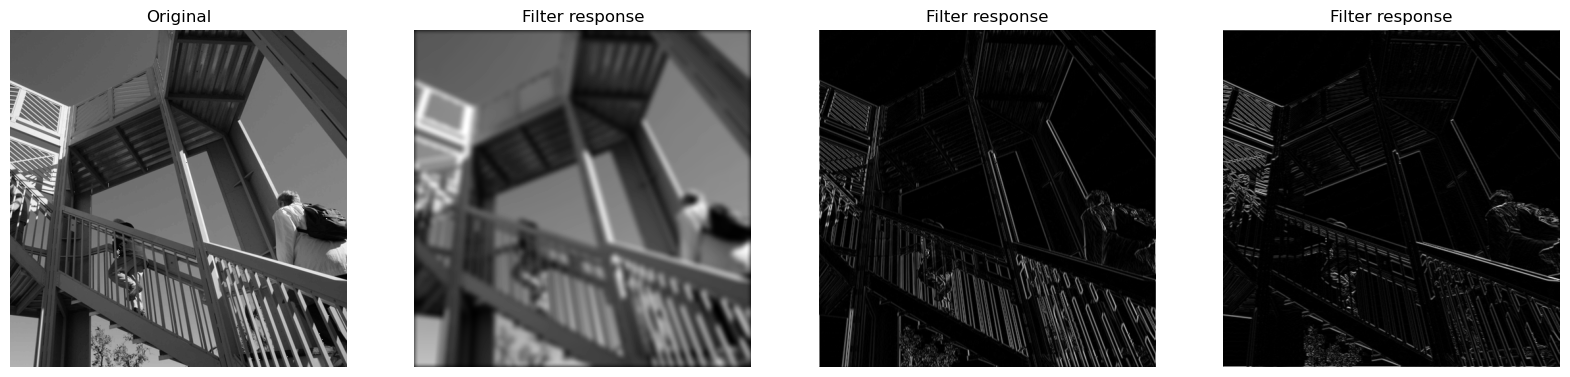

In [121]:
import matplotlib.pyplot as plt

# Show filter responses
fig, (ax_orig, ax_filt1, ax_filt2, ax_filt3) = plt.subplots(1, 4, figsize=(20, 6))
ax_orig.imshow(image, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_filt1.imshow(np.absolute(filterResponseGauss), cmap='gray')
ax_filt1.set_title('Filter response')
ax_filt1.set_axis_off()
ax_filt2.imshow(np.absolute(filterResponseSobelX), cmap='gray')
ax_filt2.set_title('Filter response')
ax_filt2.set_axis_off()
ax_filt3.imshow(np.absolute(filterResponseSobelY), cmap='gray')
ax_filt3.set_title('Filter response')
ax_filt3.set_axis_off()

##  Part 2: Understanding convolutions

Question 1: What do the 3 different filters (Gaussian, SobelX, SobelY) do to the original image?\
Gaussian filter is used for denoising, Here we can see that bu applying gaissian filter to the image, the image is smoother than the original image.
Sobel X & sobel Y are an spatial filter used for edge detection in horizontal and vertical directions respectively. Here we can see in second image the edge and features of image in horizontal axis better and in third image the edge and features of image in vertical axis.


Question 2: What is the size of the original image? How many channels does it have? How many channels does a color image normally have?\
Size of original image: (512, 512)
Number of channels in original image: 1


Question 3: What is the size of the different filters?\
Size of the Gaussian filter: (15, 15)
Size of the SobelX filter: (3, 3)
Size of the SobelY filter: (3, 3)


Question 4: What is the size of the filter response if mode 'same' is used for the convolution ?\
In case we use mode (same), so filter response is the same as input image.


Question 5: What is the size of the filter response if mode 'valid' is used for the convolution? How does the size of the valid filter response depend on the size of the filter?\
In case we set mode on valid the size of response is depend on the size of image and filter in case we have (nm) image and (Kk) filter the size of response is (n-k+1,m-k+1)


Question 6: Why are 'valid' convolutions a problem for CNNs with many layers?\
when we use the filter with valid it reduce the size of feature map in each step as mentioned above so our feature map will be so small after many layers of convolution.


In [122]:
# Your code for checking sizes of image and filter responses
#Question 2
# Get the size of the original image
print("Size of original image:", image.shape)

# Get the number of channels in the original image
if len(image.shape) == 2:
    number_channels = 1
else:
    number_channels = image.shape[2]
print("Number of channels in original image:", number_channels)\


#Question 3
# Print the size of the different filters
print("Size of the Gaussian filter:", gaussFilter.shape)
print("Size of the SobelX filter:", sobelX.shape)
print("Size of the SobelY filter:", sobelY.shape)



Size of original image: (512, 512)
Number of channels in original image: 1
Size of the Gaussian filter: (15, 15)
Size of the SobelX filter: (3, 3)
Size of the SobelY filter: (3, 3)


##  Part 3: Get a graphics card

Skip this part if you run on a CPU (recommended)

Let's make sure that our script can see the graphics card that will be used. The graphics cards will perform all the time consuming convolutions in every training iteration.

In [123]:
import os
import warnings

# Ignore FutureWarning from numpy
warnings.simplefilter(action='ignore', category=FutureWarning)

import keras.backend as K
import tensorflow as tf

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

# Allow growth of GPU memory, otherwise it will always look like all the memory is being used
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True) 

IndexError: list index out of range

##  Part 4: How fast is the graphics card?

Question 7: Why are the filters used for a color image of size 7 x 7 x 3, and not 7 x 7 ?\
The input image has three color channels: red, green, and blue (RGB).
So we need 3 dimensional filter not 2D.

Question 8: What operation is performed by the 'Conv2D' layer? Is it a standard 2D convolution, as performed by the function signal.convolve2d we just tested?\
The Conv2D operation is a 2D convolution operation, but there is a difference between Conv2D and signal.convolve2d. in signal.convolve2d its a predefined filters but the filters in a 'Conv2D' layer are learned from data.

Question 9: Do you think that a graphics card, compared to the CPU, is equally faster for convolving a batch of 1,000 images, compared to convolving a batch of 3 images? Motivate your answer.\
In case we have larger batch size (1000 images) GPU can divided works for processing between different cores and process data more speedy. So the specific speedup achieved by using a GPU can happen in larger batch size.


##  Part 5:  Load data
Time to make a 2D CNN. Load the images and labels from keras.datasets, this cell is already finished.

In [124]:
from keras.datasets import cifar10
import numpy as np

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Download CIFAR train and test data
(Xtrain, Ytrain), (Xtest, Ytest) = cifar10.load_data()

print("Training images have size {} and labels have size {} ".format(Xtrain.shape, Ytrain.shape))
print("Test images have size {} and labels have size {} \n ".format(Xtest.shape, Ytest.shape))

# Reduce the number of images for training and testing to 10000 and 2000 respectively, 
# to reduce processing time for this laboration
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

Xtest = Xtest[0:2000]
Ytest = Ytest[0:2000]

Ytestint = Ytest

print("Reduced training images have size %s and labels have size %s " % (Xtrain.shape, Ytrain.shape))
print("Reduced test images have size %s and labels have size %s \n" % (Xtest.shape, Ytest.shape))

# Check that we have some training examples from each class
for i in range(10):
    print("Number of training examples for class {} is {}" .format(i,np.sum(Ytrain == i)))

Training images have size (50000, 32, 32, 3) and labels have size (50000, 1) 
Test images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
 
Reduced training images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
Reduced test images have size (2000, 32, 32, 3) and labels have size (2000, 1) 

Number of training examples for class 0 is 1005
Number of training examples for class 1 is 974
Number of training examples for class 2 is 1032
Number of training examples for class 3 is 1016
Number of training examples for class 4 is 999
Number of training examples for class 5 is 937
Number of training examples for class 6 is 1030
Number of training examples for class 7 is 1001
Number of training examples for class 8 is 1025
Number of training examples for class 9 is 981


##  Part 6: Plotting

Lets look at some of the training examples, this cell is already finished. You will see different examples every time you run the cell.

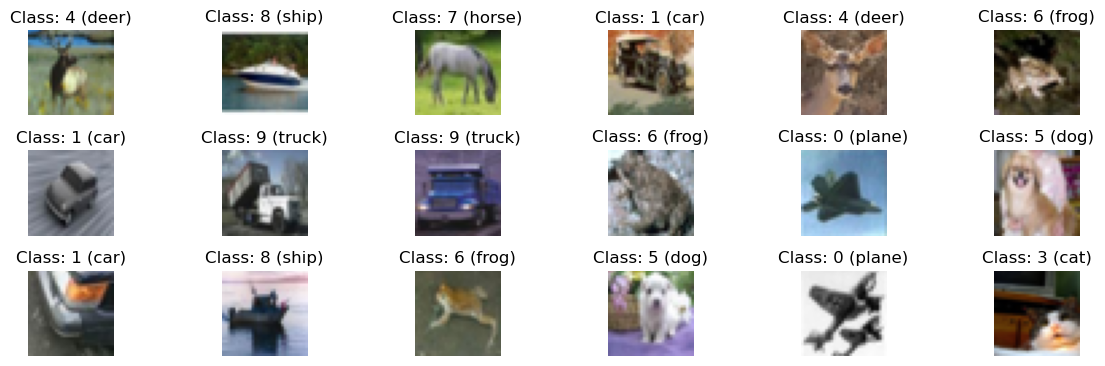

In [125]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
for i in range(18):
    idx = np.random.randint(7500)
    label = Ytrain[idx,0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(Xtrain[idx])
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

##   Part 7: Split data into training, validation and testing
Split your training data into training (Xtrain, Ytrain) and validation (Xval, Yval), so that we have training, validation and test datasets (as in the previous laboration). We use a function in scikit learn. Use 25% of the data for validation.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [126]:
from sklearn.model_selection import train_test_split

# Your code for splitting the dataset (Training - Validation - Testing)
# Split the train data: 75% for training and 25% for validation

Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain, test_size=0.25, random_state=42)

# Print the size of training data, validation data and test data
print("Size of Train data is: {} and Size of Train labels is: {}".format(Xtrain.shape, Ytrain.shape))
print("Size of Validation data is: {} and Size of Validation labels is: {}".format(Xval.shape, Yval.shape))
print("Size of Test data is: {} and Size of Test labels is: {}".format(Xtest.shape, Ytest.shape))


Size of Train data is: (7500, 32, 32, 3) and Size of Train labels is: (7500, 1)
Size of Validation data is: (2500, 32, 32, 3) and Size of Validation labels is: (2500, 1)
Size of Test data is: (2000, 32, 32, 3) and Size of Test labels is: (2000, 1)


##  Part 8: Preprocessing of images

Lets perform some preprocessing. The images are stored as uint8, i.e. 8 bit unsigned integers, but need to be converted to 32 bit floats. We also make sure that the range is -1 to 1, instead of 0 - 255. This cell is already finished.

In [127]:
# Convert datatype for Xtrain, Xval, Xtest, to float32
Xtrain = Xtrain.astype('float32')
Xval = Xval.astype('float32')
Xtest = Xtest.astype('float32')

# Change range of pixel values to [-1,1]
Xtrain = Xtrain / 127.5 - 1
Xval = Xval / 127.5 - 1
Xtest = Xtest / 127.5 - 1

##  Part 9: Preprocessing of labels

The labels (Y) need to be converted from e.g. '4' to "hot encoded", i.e. to a vector of type [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] . We use a function in Keras, see https://keras.io/api/utils/python_utils/#to_categorical-function

In [128]:
from tensorflow.keras.utils import to_categorical

# Print shapes before converting the labels
print("Shape of Ytrain:", Ytrain.shape)
print("Shape of Yval:", Yval.shape)
print("Shape of Ytest:", Ytest.shape)

# Your code for converting Ytrain, Yval, Ytest to categorical
Ytrain = to_categorical(Ytrain, num_classes=10)
Yval = to_categorical(Yval, num_classes=10)
Ytest = to_categorical(Ytest, num_classes=10)

# Print shapes after converting the labels
print("New shape of Ytrain:", Ytrain.shape)
print("New shape of Yval:", Yval.shape)
print("New shape of Ytest:", Ytest.shape)

Shape of Ytrain: (7500, 1)
Shape of Yval: (2500, 1)
Shape of Ytest: (2000, 1)
New shape of Ytrain: (7500, 10)
New shape of Yval: (2500, 10)
New shape of Ytest: (2000, 10)


##  Part 10: 2D CNN
Finish this code to create the image classifier, using a 2D CNN. Each convolutional layer will contain 2D convolution, batch normalization and max pooling. After the convolutional layers comes a flatten layer and a number of intermediate dense layers. The convolutional layers should take the number of filters as an argument, use a kernel size of 3 x 3, 'same' padding, and relu activation functions. The number of filters will double with each convolutional layer. The max pooling layers should have a pool size of 2 x 2. The intermediate dense layers before the final dense layer should take the number of nodes as an argument, use relu activation functions, and be followed by batch normalization. The final dense layer should have 10 nodes (= the number of classes in this laboration) and 'softmax' activation. Here we start with the Adam optimizer.

Relevant functions are

`model.add()`, adds a layer to the network

`Dense()`, a dense network layer

`Conv2D()`, performs 2D convolutions with a number of filters with a certain size (e.g. 3 x 3). 

`BatchNormalization()`, perform batch normalization

`MaxPooling2D()`, saves the max for a given pool size, results in down sampling

`Flatten()`, flatten a multi-channel tensor into a long vector

`model.compile()`, compile the model, add " metrics=['accuracy'] " to print the classification accuracy during the training

See https://keras.io/api/layers/core_layers/dense/ and https://keras.io/api/layers/reshaping_layers/flatten/ for information on how the `Dense()` and `Flatten()` functions work

See https://keras.io/layers/convolutional/ for information on how `Conv2D()` works

See https://keras.io/layers/pooling/ for information on how `MaxPooling2D()` works

Import a relevant cost function for multi-class classification from keras.losses (https://keras.io/losses/) , it relates to how many classes you have.

See the following links for how to compile, train and evaluate the model

https://keras.io/api/models/model_training_apis/#compile-method

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method

In [129]:
from keras.models import Sequential, Model
from keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy

# Set seed from random number generator, for better comparisons
from numpy.random import seed
seed(123)

def build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=0, n_nodes=50, use_dropout=False, learning_rate=0.01):

    # Setup a sequential model
    model = Sequential()

    # Add first convolutional layer to the model, requires input shape
    model.add(Conv2D(filters=n_filters, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    
    # Add remaining convolutional layers to the model, the number of filters should increase a factor 2 for each layer
    for i in range(n_conv_layers-1):
        n_filters *= 2
        model.add(Conv2D(filters=n_filters, kernel_size=(3, 3), padding='same', activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Add flatten layer
    model.add(Flatten())
    
    # Add intermediate dense layers
    for i in range(n_dense_layers):
        model.add(Dense(units=n_nodes, activation='relu'))
        model.add(BatchNormalization())
        
        if use_dropout:
            model.add(Dropout(rate=0.5))
        
    # Add final dense layer
    model.add(Dense(units=10, activation='softmax'))
   
    # Compile model
    optimizer = Adam(learning_rate=learning_rate)
    loss = CategoricalCrossentropy()
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [130]:
# Lets define a help function for plotting the training results
import matplotlib.pyplot as plt
def plot_results(history):
    
    loss = history.history['loss']
    acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()

## Part 11: Train 2D CNN

Time to train the 2D CNN, start with 2 convolutional layers, no intermediate dense layers, learning rate = 0.01. The first convolutional layer should have 16 filters (which means that the second convolutional layer will have 32 filters).

Relevant functions

`build_CNN`, the function we defined in Part 10, call it with the parameters you want to use

`model.fit()`, train the model with some training data

`model.evaluate()`, apply the trained model to some test data

See the following links for how to train and evaluate the model

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method

## 2 convolutional layers, no intermediate dense layers

In [60]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]

# Build model
model1 = build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=0, n_nodes=50, use_dropout=False, learning_rate=0.01)
 
# Train the model  using training data and validation data
history1 = model1.fit(Xtrain, Ytrain, batch_size=batch_size, epochs=epochs, verbose='auto', validation_data=(Xval, Yval))

Epoch 1/20
75/75 [==============================] - 4s 42ms/step - loss: 2.9645 - accuracy: 0.3304 - val_loss: 2.0505 - val_accuracy: 0.2992
Epoch 2/20
75/75 [==============================] - 3s 41ms/step - loss: 1.6035 - accuracy: 0.4648 - val_loss: 1.6297 - val_accuracy: 0.4296
Epoch 3/20
75/75 [==============================] - 3s 43ms/step - loss: 1.2293 - accuracy: 0.5635 - val_loss: 1.4942 - val_accuracy: 0.4588
Epoch 4/20
75/75 [==============================] - 3s 45ms/step - loss: 1.1052 - accuracy: 0.6064 - val_loss: 1.3538 - val_accuracy: 0.5208
Epoch 5/20
75/75 [==============================] - 3s 43ms/step - loss: 1.0188 - accuracy: 0.6387 - val_loss: 1.2990 - val_accuracy: 0.5516
Epoch 6/20
75/75 [==============================] - 3s 36ms/step - loss: 0.9102 - accuracy: 0.6812 - val_loss: 1.2564 - val_accuracy: 0.5612
Epoch 7/20
75/75 [==============================] - 3s 44ms/step - loss: 0.8359 - accuracy: 0.7075 - val_loss: 1.2720 - val_accuracy: 0.5836
Epoch 8/20
75

In [61]:
# Evaluate the trained model on test set, not used in training or validation
score = model1.evaluate(Xtest, Ytest, verbose='auto')
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 2s 21ms/step - loss: 2.8914 - accuracy: 0.5475
Test loss: 2.8914
Test accuracy: 0.5475


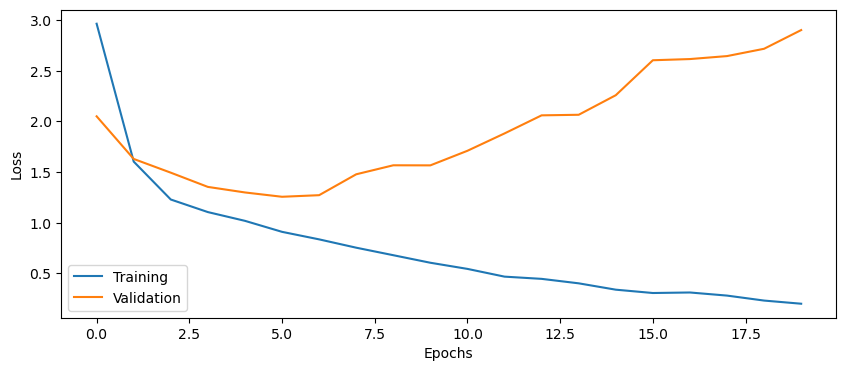

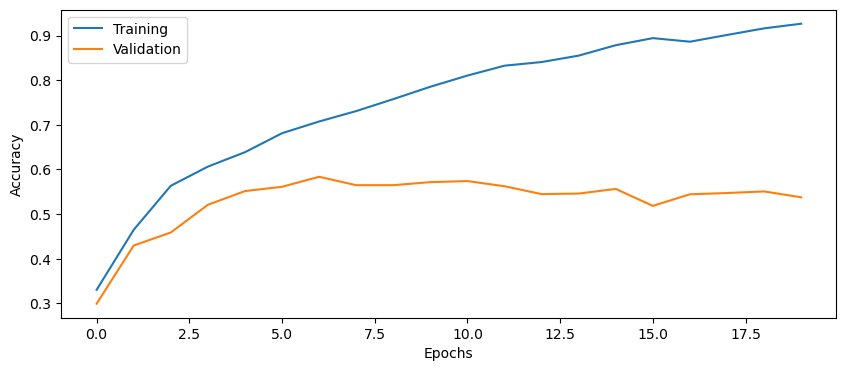

In [62]:
# Plot the history from the training run
plot_results(history1)

## Part 12: Improving performance

Write down the test accuracy, are you satisfied with the classifier performance (random chance is 10%) ? 

Question 10: How big is the difference between training and test accuracy?\
Train accuracy is: 92% but test accuracy is 52%.

Question 11: For the DNN laboration we used a batch size of 10,000, why do we need to use a smaller batch size in this laboration?\
In DNN using a large batch size can be useful as it reduce the risk of overfirring and it leads to convergance with higher speed. On the other hand in CNN Large batch size lead to very hich computational cost.

## 2 convolutional layers, 1 intermediate dense layer (50 nodes)

In [63]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]

# Build model
model2 = build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=1, n_nodes=50, use_dropout=False, learning_rate=0.01)

# Train the model  using training data and validation data
history2 = model2.fit(Xtrain, Ytrain, batch_size=batch_size, epochs=epochs, verbose='auto', validation_data=(Xval, Yval))

Epoch 1/20
75/75 [==============================] - 8s 65ms/step - loss: 1.7087 - accuracy: 0.3989 - val_loss: 1.7467 - val_accuracy: 0.3452
Epoch 2/20
75/75 [==============================] - 4s 50ms/step - loss: 1.3235 - accuracy: 0.5235 - val_loss: 2.0062 - val_accuracy: 0.3124
Epoch 3/20
75/75 [==============================] - 3s 41ms/step - loss: 1.1140 - accuracy: 0.6025 - val_loss: 1.8925 - val_accuracy: 0.3768
Epoch 4/20
75/75 [==============================] - 4s 52ms/step - loss: 0.9366 - accuracy: 0.6675 - val_loss: 1.3813 - val_accuracy: 0.5320
Epoch 5/20
75/75 [==============================] - 4s 59ms/step - loss: 0.7298 - accuracy: 0.7425 - val_loss: 1.6277 - val_accuracy: 0.5176
Epoch 6/20
75/75 [==============================] - 4s 50ms/step - loss: 0.5945 - accuracy: 0.7880 - val_loss: 1.6428 - val_accuracy: 0.5628
Epoch 7/20
75/75 [==============================] - 3s 45ms/step - loss: 0.4143 - accuracy: 0.8593 - val_loss: 1.7816 - val_accuracy: 0.5572
Epoch 8/20
75

In [64]:
# Evaluate the trained model on test set, not used in training or validation
score = model2.evaluate(Xtest, Ytest, verbose='auto')
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 2s 19ms/step - loss: 3.0774 - accuracy: 0.5485
Test loss: 3.0774
Test accuracy: 0.5485


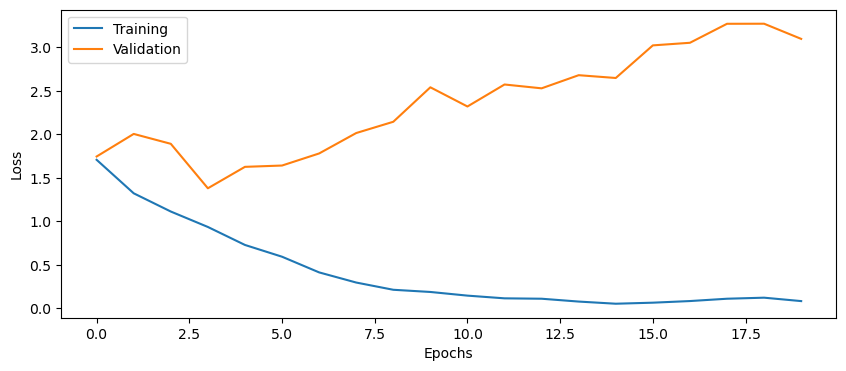

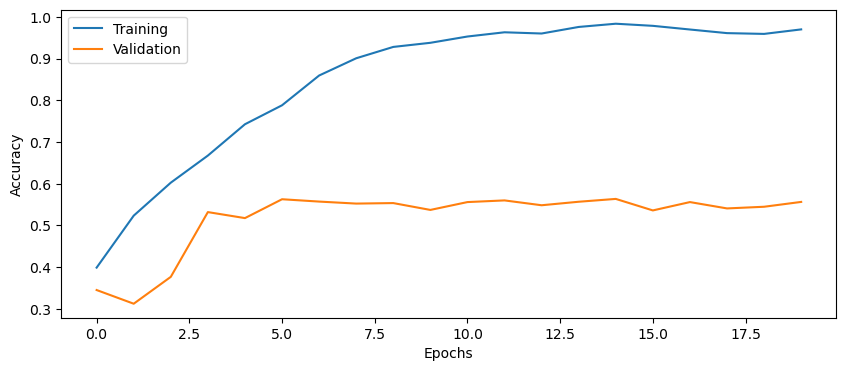

In [65]:
# Plot the history from the training run
plot_results(history2)

## 4 convolutional layers, 1 intermediate dense layer (50 nodes)

In [66]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]

# Build model
model3 = build_CNN(input_shape, n_conv_layers=4, n_filters=16, n_dense_layers=1, n_nodes=50, use_dropout=False, learning_rate=0.01)


# Train the model  using training data and validation data
history3 = model2.fit(Xtrain, Ytrain, batch_size=batch_size, epochs=epochs, verbose='auto', validation_data=(Xval, Yval))

Epoch 1/20
75/75 [==============================] - 3s 45ms/step - loss: 0.0623 - accuracy: 0.9800 - val_loss: 3.2407 - val_accuracy: 0.5548
Epoch 2/20
75/75 [==============================] - 3s 43ms/step - loss: 0.0486 - accuracy: 0.9833 - val_loss: 3.0728 - val_accuracy: 0.5608
Epoch 3/20
75/75 [==============================] - 3s 43ms/step - loss: 0.0418 - accuracy: 0.9871 - val_loss: 3.1913 - val_accuracy: 0.5608
Epoch 4/20
75/75 [==============================] - 3s 38ms/step - loss: 0.0420 - accuracy: 0.9859 - val_loss: 3.1139 - val_accuracy: 0.5584
Epoch 5/20
75/75 [==============================] - 3s 42ms/step - loss: 0.0315 - accuracy: 0.9891 - val_loss: 3.1678 - val_accuracy: 0.5520
Epoch 6/20
75/75 [==============================] - 4s 47ms/step - loss: 0.0234 - accuracy: 0.9928 - val_loss: 3.2451 - val_accuracy: 0.5544
Epoch 7/20
75/75 [==============================] - 4s 49ms/step - loss: 0.0144 - accuracy: 0.9968 - val_loss: 3.1894 - val_accuracy: 0.5572
Epoch 8/20
75

In [68]:
# Evaluate the trained model on test set, not used in training or validation
score = model3.evaluate(Xtest, Ytest, verbose='auto')
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 13ms/step - loss: 2.3072 - accuracy: 0.0905
Test loss: 2.3072
Test accuracy: 0.0905


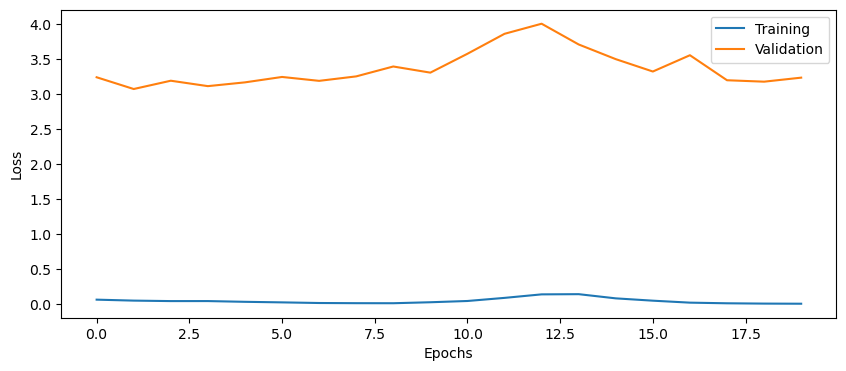

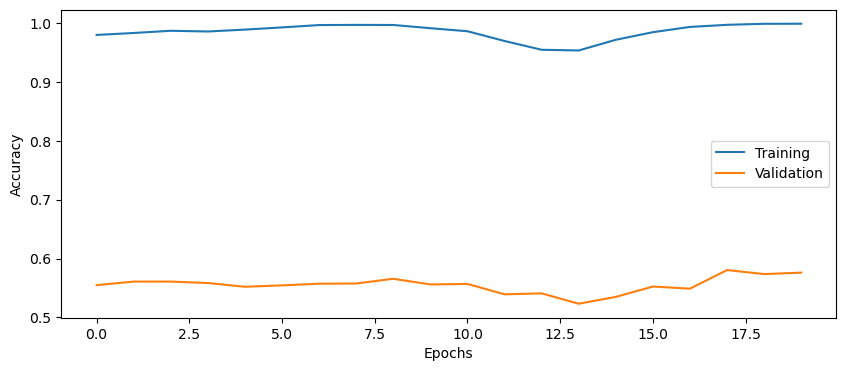

In [69]:
# Plot the history from the training run
plot_results(history3)

##  Part 13: Plot the CNN architecture

To understand your network better, print the architecture using `model.summary()`

Question 12: How many trainable parameters does your network have? Which part of the network contains most of the parameters?\
Trainable params: 124,180

Question 13: What is the input to and output of a Conv2D layer? What are the dimensions of the input and output?\
input of 2D, 4D tensor with shape: batch_shape + (rows, cols, channels)\
Output of 2D, 4D tensor with shape: batch_shape + (new_rows, new_cols, filters)

Question 14: Is the batch size always the first dimension of each 4D tensor? Check the documentation for Conv2D, https://keras.io/layers/convolutional/ \
Referring to documentation batch size is always come first

Question 15: If a convolutional layer that contains 128 filters is applied to an input with 32 channels, what is the number of channels in the output?\
128 as the number of channels in the output is the number of filters : batch_shape + (new_rows, new_cols, filters)

Question 16: Why is the number of parameters in each Conv2D layer not equal to the number of filters times the number of filter coefficients per filter (plus biases)?\
In CNN, for different input image parts, the same set of filter coefficients are applied, and the biases are shared across all the filters in the same layer. so the number of parameters which is needed to be learned are decreased

Question 17: How does MaxPooling help in reducing the number of parameters to train?\
MaxPooling decrease the size of feature map and keep the important features so its reduce the number of parameters in the subsequent layers.


In [131]:
# Print network architecture

model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 16)       64        
 chNormalization)                                                
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 batch_normalization_13 (Bat  (None, 16, 16, 32)       128       
 chNormalization)                                                
                                                      

##  Part 14: Dropout regularization

Add dropout regularization between each intermediate dense layer, dropout probability 50%.

Question 18: How much did the test accuracy improve with dropout, compared to without dropout?\
In case we do not have dropout the test accuracy is about 9% and when we set a dropout it increase to 60% 


Question 19: What other types of regularization can be applied? How can you add L2 regularization for the convolutional layers?\
L1 and L2 Regularization
we can add L2 regularization just with adding argument kernel_regularizer=l2(..)



## 4 convolutional layers, 1 intermediate dense layer (50 nodes), dropout

In [73]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]

# Build model
model4 = build_CNN(input_shape, n_conv_layers=4, n_filters=16, n_dense_layers=1, n_nodes=50, use_dropout=True, learning_rate=0.01)


# Train the model  using training data and validation data
history4 = model4.fit(Xtrain, Ytrain, batch_size=batch_size, epochs=epochs, verbose='auto', validation_data=(Xval, Yval))

Epoch 1/20
75/75 [==============================] - 8s 62ms/step - loss: 2.0910 - accuracy: 0.2673 - val_loss: 1.9249 - val_accuracy: 0.3040
Epoch 2/20
75/75 [==============================] - 3s 40ms/step - loss: 1.6327 - accuracy: 0.3928 - val_loss: 1.7129 - val_accuracy: 0.3804
Epoch 3/20
75/75 [==============================] - 3s 40ms/step - loss: 1.4902 - accuracy: 0.4503 - val_loss: 1.6100 - val_accuracy: 0.4128
Epoch 4/20
75/75 [==============================] - 5s 65ms/step - loss: 1.3652 - accuracy: 0.4995 - val_loss: 1.3843 - val_accuracy: 0.5204
Epoch 5/20
75/75 [==============================] - 5s 62ms/step - loss: 1.2508 - accuracy: 0.5412 - val_loss: 1.5449 - val_accuracy: 0.4772
Epoch 6/20
75/75 [==============================] - 4s 52ms/step - loss: 1.1422 - accuracy: 0.5817 - val_loss: 1.4007 - val_accuracy: 0.5432
Epoch 7/20
75/75 [==============================] - 5s 68ms/step - loss: 1.0415 - accuracy: 0.6239 - val_loss: 1.2711 - val_accuracy: 0.5916
Epoch 8/20
75

In [74]:
# Evaluate the trained model on test set, not used in training or validation
score = model4.evaluate(Xtest, Ytest, verbose='auto')
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 7ms/step - loss: 2.3540 - accuracy: 0.5880
Test loss: 2.3540
Test accuracy: 0.5880


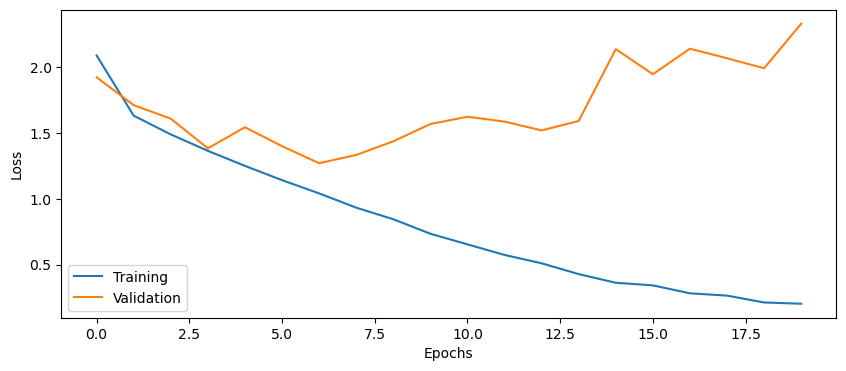

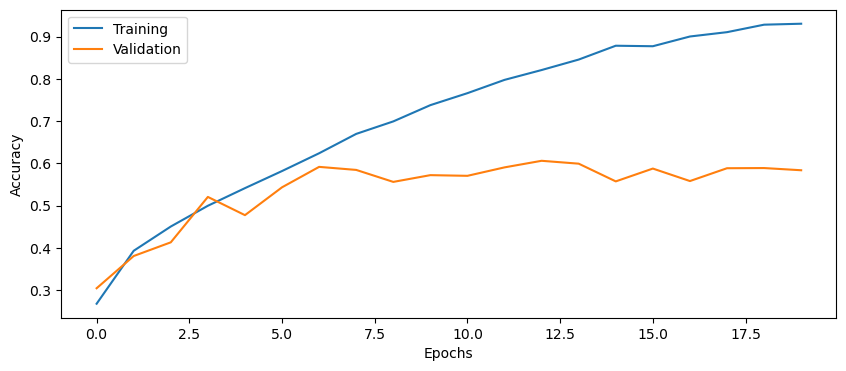

In [75]:
# Plot the history from the training run
plot_results(history4)

##  Part 15: Tweaking performance

You have now seen the basic building blocks of a 2D CNN. To further improve performance involves changing the number of convolutional layers, the number of filters per layer, the number of intermediate dense layers, the number of nodes in the intermediate dense layers, batch size, learning rate, number of epochs, etc. Spend some time (30 - 90 minutes) testing different settings.

Question 20: How high test accuracy can you obtain? What is your best configuration?\
Test accuracy is: 57.6%


Our best configuration defined as below:\
batch_size = 400\
epochs = 50\
input_shape = Xtrain.shape[1:]\
number of convolutional layer: 4\
number of filters: 16\
number of dence layer: 1\
number of nodes in each dence layer: 15\
use dropout: True\
learning rate: 0.005

## Your best config

In [132]:
# Setup some training parameters
batch_size = 64
epochs = 28
input_shape = Xtrain.shape[1:]

# Build model
model5 = build_CNN(input_shape, n_conv_layers=4, n_filters=32, n_dense_layers=1, n_nodes=40, use_dropout=True, learning_rate=0.01)

# Train the model  using training data and validation data
history5 = model5.fit(Xtrain, Ytrain, batch_size=batch_size, epochs=epochs, verbose='auto', validation_data=(Xval, Yval))

Epoch 1/28
118/118 [==============================] - 13s 97ms/step - loss: 1.9399 - accuracy: 0.3075 - val_loss: 1.9011 - val_accuracy: 0.3024
Epoch 2/28
118/118 [==============================] - 12s 104ms/step - loss: 1.5573 - accuracy: 0.4213 - val_loss: 1.5010 - val_accuracy: 0.4632
Epoch 3/28
118/118 [==============================] - 13s 109ms/step - loss: 1.3984 - accuracy: 0.4783 - val_loss: 1.3798 - val_accuracy: 0.5104
Epoch 4/28
118/118 [==============================] - 14s 120ms/step - loss: 1.2747 - accuracy: 0.5392 - val_loss: 1.3126 - val_accuracy: 0.5428
Epoch 5/28
118/118 [==============================] - 13s 113ms/step - loss: 1.1576 - accuracy: 0.5795 - val_loss: 1.3693 - val_accuracy: 0.5412
Epoch 6/28
118/118 [==============================] - 12s 105ms/step - loss: 1.0187 - accuracy: 0.6420 - val_loss: 1.4048 - val_accuracy: 0.5256
Epoch 7/28
118/118 [==============================] - 12s 102ms/step - loss: 0.9085 - accuracy: 0.6745 - val_loss: 1.7807 - val_acc

In [133]:
# Evaluate the trained model on test set, not used in training or validation
score = model5.evaluate(Xtest, Ytest, verbose='auto')
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 15ms/step - loss: 2.1320 - accuracy: 0.6225
Test loss: 2.1320
Test accuracy: 0.6225


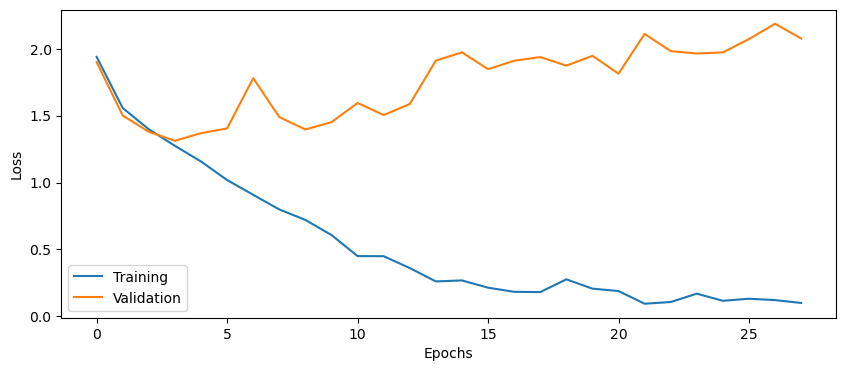

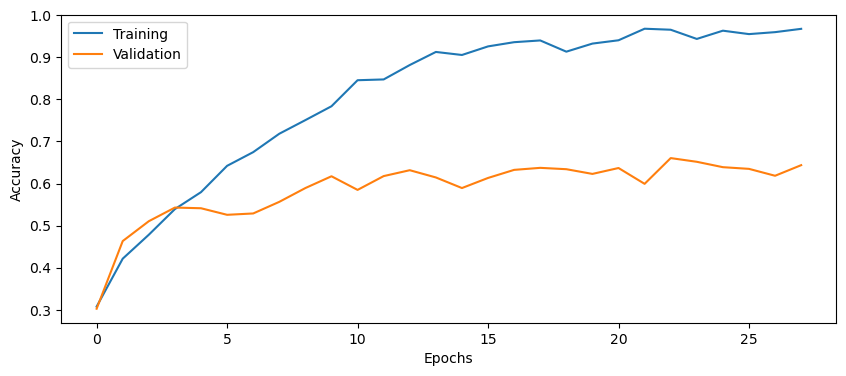

In [134]:
# Plot the history from the training run
plot_results(history5)

##  Part 16: Rotate the test images

How high is the test accuracy if we rotate the test images? In other words, how good is the CNN at generalizing to rotated images?

Rotate each test image 90 degrees, the cells are already finished.

Question 21: What is the test accuracy for rotated test images, compared to test images without rotation? Explain the difference in accuracy.\
Test accuracy for rotated test images: 62.15%
Test accuracy for images without rotation: 62.25%

There is not any specific difference between these two accuracies.

In [105]:
def myrotate(images):

    images_rot = np.rot90(images, axes=(1,2))
    
    return images_rot

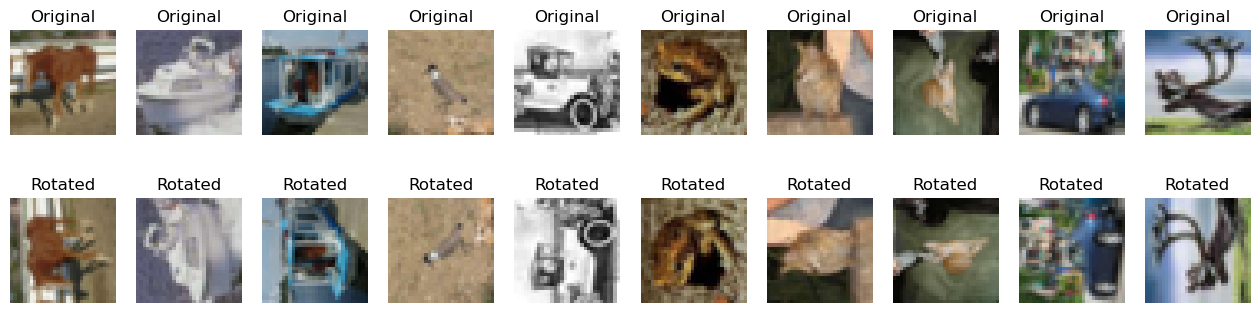

In [115]:
# Rotate the test images 90 degrees
Xtest_rotated = myrotate(Xtest)

# Look at some rotated images
plt.figure(figsize=(16,4))
for i in range(10):
    idx = np.random.randint(500)
    
    plt.subplot(2,10,i+1)
    plt.imshow(Xtest[idx]/2+0.5)
    plt.title("Original")
    plt.axis('off')
    
    plt.subplot(2,10,i+11)
    plt.imshow(Xtest_rotated[idx]/2+0.5)
    plt.title("Rotated")
    plt.axis('off')
plt.show()


In [107]:
# Evaluate the trained model on rotated test set
score = model5.evaluate(Xtest, Ytest, verbose='auto')
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 2s 29ms/step - loss: 2.2842 - accuracy: 0.6215
Test loss: 2.2842
Test accuracy: 0.6215


##  Part 17: Augmentation using Keras `ImageDataGenerator`

We can increase the number of training images through data augmentation (we now ignore that CIFAR10 actually has 60 000 training images). Image augmentation is about creating similar images, by performing operations such as rotation, scaling, elastic deformations and flipping of existing images. This will prevent overfitting, especially if all the training images are in a certain orientation.

We will perform the augmentation on the fly, using a built-in function in Keras, called `ImageDataGenerator`

See https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator , the .flow(x,y) functionality

Make sure to use different subsets for training and validation when you setup the flows, otherwise you will validate on the same data...

In [135]:
# Get all 60 000 training images again. ImageDataGenerator manages validation data on its own
(Xtrain, Ytrain), _ = cifar10.load_data()

# Reduce number of images to 10,000
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

# Change data type and rescale range
Xtrain = Xtrain.astype('float32')
Xtrain = Xtrain / 127.5 - 1

# Convert labels to hot encoding
Ytrain = to_categorical(Ytrain, 10)

In [136]:
# Set up a data generator with on-the-fly data augmentation, 20% validation split
# Use a rotation range of 30 degrees, horizontal and vertical flipping
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=30, horizontal_flip=True, vertical_flip=True, validation_split=0.2)

# Setup a flow for training data, assume that we can fit all images into CPU memory
training_gen = datagen.flow(Xtrain, Ytrain, batch_size=64, subset='training')


# Setup a flow for validation data, assume that we can fit all images into CPU memory
validation_gen = datagen.flow(Xtrain, Ytrain, batch_size=64, subset='validation')



## Part 18: What about big data?

Question 22: How would you change the code for the image generator if you cannot fit all training images in CPU memory? What is the disadvantage of doing that change?\
In this case we should use .flow_from_directory method of the ImageDataGenerator, and the problem is that as it should generate image for train so the speed of training is lower in compare filling all data.

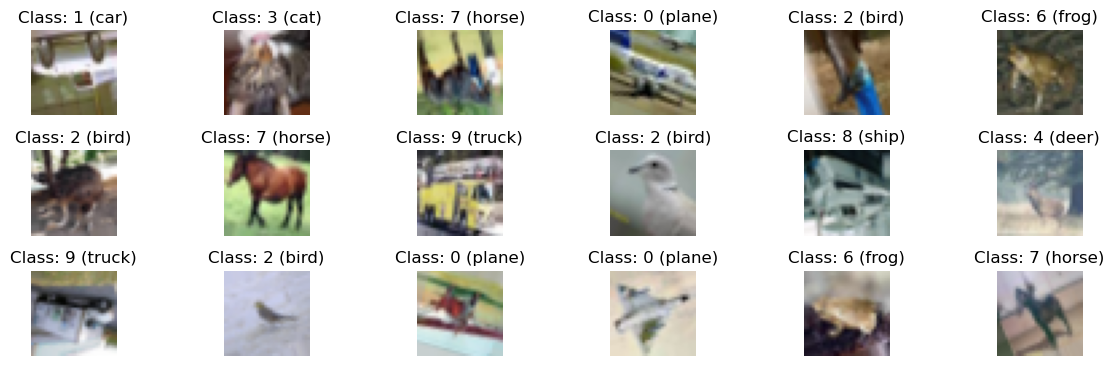

In [137]:
# Plot some augmented images
plot_datagen = datagen.flow(Xtrain, Ytrain, batch_size=1)

plt.figure(figsize=(12,4))
for i in range(18):
    (im, label) = plot_datagen.next()
    im = (im[0] + 1) * 127.5
    im = im.astype('int')
    label = np.flatnonzero(label)[0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

## Part 19: Train the CNN with images from the generator

See https://keras.io/api/models/model_training_apis/#fit-method for how to use model.fit with a generator instead of a fix dataset (numpy arrays)

To make the comparison fair to training without augmentation

    steps_per_epoch should be set to: len(Xtrain)*(1 - validation_split)/batch_size

    validation_steps should be set to: len(Xtrain)*validation_split/batch_size
    
This is required since with a generator, the fit function will not know how many examples your original dataset has.

Question 23: How quickly is the training accuracy increasing compared to without augmentation? Explain why there is a difference compared to without augmentation. We are here talking about the number of training epochs required to reach a certain accuracy, and not the training time in seconds. What parameter is necessary to change to perform more training?\
when we use augmentation we make different set of image and so the model see different images so the tarin is slower than the model without augmentation. For example we can see that in case we do not have data augmentation in 28th epochs, our train accuracy is 96% compare to augmentation in 28th epochs about 50%.\
So in this model, the Epochs number should be increased

Question 24: What other types of image augmentation can be applied, compared to what we use here?\
Vertical shift, Horizontal shift, Vertical flip, Horizontal flip, Rotation, Brightness adjustment, and Zoom In/Out.

In [116]:
# Setup some training parameters
batch_size = 100
epochs = 200
input_shape = Xtrain.shape[1:]

# Build model (your best config)
model6 = build_CNN(input_shape, n_conv_layers=4, n_filters=32, n_dense_layers=1, n_nodes=40, use_dropout=True, learning_rate=0.01)

validation_split=0.2
    
# Train the model using on the fly augmentation
history6 = model6.fit(training_gen, steps_per_epoch=len(Xtrain)*(1-validation_split)/batch_size, epochs=epochs, validation_data=validation_gen, validation_steps=len(Xtrain)*validation_split/batch_size)

Epoch 1/200
80/80 [==============================] - 23s 229ms/step - loss: 2.1938 - accuracy: 0.2275 - val_loss: 2.0671 - val_accuracy: 0.2320
Epoch 2/200
80/80 [==============================] - 14s 172ms/step - loss: 1.8568 - accuracy: 0.3094 - val_loss: 2.0602 - val_accuracy: 0.2500
Epoch 3/200
80/80 [==============================] - 14s 171ms/step - loss: 1.7811 - accuracy: 0.3404 - val_loss: 1.7072 - val_accuracy: 0.3734
Epoch 4/200
80/80 [==============================] - 14s 170ms/step - loss: 1.7135 - accuracy: 0.3568 - val_loss: 1.6076 - val_accuracy: 0.4133
Epoch 5/200
80/80 [==============================] - 14s 178ms/step - loss: 1.6788 - accuracy: 0.3816 - val_loss: 1.8617 - val_accuracy: 0.3727
Epoch 6/200
80/80 [==============================] - 14s 172ms/step - loss: 1.6215 - accuracy: 0.4020 - val_loss: 1.7499 - val_accuracy: 0.3797
Epoch 7/200
80/80 [==============================] - 14s 167ms/step - loss: 1.5700 - accuracy: 0.4221 - val_loss: 1.5183 - val_accuracy:

In [ ]:
# Check if there is still a big difference in accuracy for original and rotated test images

# Evaluate the trained model on original test set
score = model6.evaluate(Xtest, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Evaluate the trained model on rotated test set
score = model6.evaluate(Xtest_rotated, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

In [ ]:
# Plot the history from the training run
plot_results(history6)

## Part 20: Plot misclassified images

Lets plot some images where the CNN performed badly, these cells are already finished.

In [138]:
# Find misclassified images
y_pred=model6.predict(Xtest) 
y_pred=np.argmax(y_pred,axis=1)

y_correct = np.argmax(Ytest,axis=-1)

miss = np.flatnonzero(y_correct != y_pred)

63/63 [==============================] - 1s 16ms/step


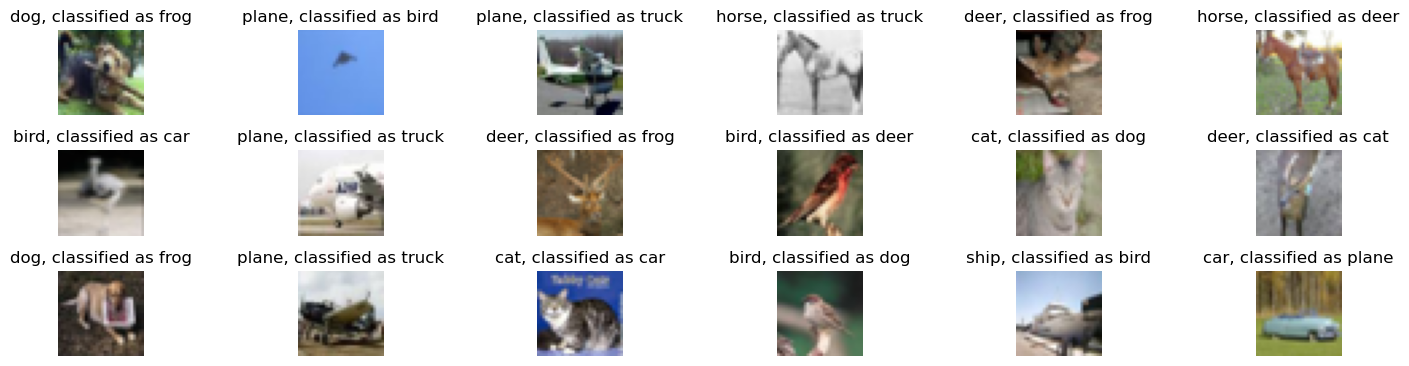

In [139]:
# Plot a few of them
plt.figure(figsize=(15,4))
perm = np.random.permutation(miss)
for i in range(18):
    im = (Xtest[perm[i]] + 1) * 127.5
    im = im.astype('int')
    label_correct = y_correct[perm[i]]
    label_pred = y_pred[perm[i]]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.axis('off')
    plt.title("{}, classified as {}".format(classes[label_correct], classes[label_pred]))
plt.show()

##  Part 21: Testing on another size

Question 25: This CNN has been trained on 32 x 32 images, can it be applied to images of another size? If not, why is this the case?\
No Because we define input shape as a fixed parameter and it cannot use when changing the input shape.


Question 26: Is it possible to design a CNN that can be trained on images of one size, and then applied to an image of any size? How?\
If we need CNN model that accept all the input shape, we can define the input_shape=(None, None) and if we have RGB images the input shape can be defined as input_shape=(None, None, 3)

##  Part 22: Pre-trained 2D CNNs

There are many deep 2D CNNs that have been pre-trained using the large ImageNet database (several million images, 1000 classes). Import a pre-trained ResNet50 network from Keras applications. Show the network using `model.summary()`

Question 27: How many convolutional layers does ResNet50 have?

ResNet-50 is a 50-layer convolutional neural network (48 convolutional layers, one MaxPool layer, and one average pool layer). So it has 48 convolutional layers.


Question 28: How many trainable parameters does the ResNet50 network have?

Trainable params: 25,583,592

Question 29: What is the size of the images that ResNet50 expects as input?

ResNet50 expects input size as (224 * 224 * 3)

Question 30: Using the answer to question 28, explain why the second derivative is seldom used when training deep networks.

For computing the second derivative the computational complexity is high. From question 28 we can see that ResNet50 has 25,583,592 trainable parameters, so based on these large number of parameters, if we want to compute the second derivative, the computational complexity increase a lot and we need more memory.  

Apply the pre-trained CNN to 5 random color images that you download and copy to the cloud machine or your own computer. Are the predictions correct? How certain is the network of each image class?

These pre-trained networks can be fine tuned to your specific data, and normally only the last layers need to be re-trained, but it will still be too time consuming to do in this laboration.

See https://keras.io/api/applications/ and https://keras.io/api/applications/resnet/#resnet50-function 

Useful functions

`image.load_img` in tensorflow.keras.preprocessing

`image.img_to_array` in tensorflow.keras.preprocessing

`ResNet50` in tensorflow.keras.applications.resnet50

`preprocess_input` in tensorflow.keras.applications.resnet50

`decode_predictions` in tensorflow.keras.applications.resnet50

`expand_dims` in numpy


In [160]:
# Your code for using pre-trained ResNet 50 on 5 color images of your choice. 
# The preprocessing should transform the image to a size that is expected by the CNN.

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')
img_path=['table.jpg','airplane.jpeg','car.jpg','Elephant.jpg','cow.jpeg']
for img_path in img_path:
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    print('Predicted:', decode_predictions(preds,top=1)[0])

1/1 [==============================] - 3s 3s/step
Predicted: [('n03179701', 'desk', 0.47479048)]
1/1 [==============================] - 0s 186ms/step
Predicted: [('n02690373', 'airliner', 0.8779825)]
1/1 [==============================] - 0s 187ms/step
Predicted: [('n04285008', 'sports_car', 0.98518014)]
1/1 [==============================] - 0s 279ms/step
Predicted: [('n02504458', 'African_elephant', 0.7235868)]
1/1 [==============================] - 0s 198ms/step
Predicted: [('n02403003', 'ox', 0.9159899)]


In [161]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_19 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_19[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           